In [16]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


documents=pd.read_csv('F:\Republic Modules\RP Nvidia AI\Capstone X0PA\Week_06\Data Preparation\Cleaned Job Title\Mixed_Cleaned.csv')

documents['Tokenized_Description_Test'] = documents['Tokenized_Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
documents_df=pd.DataFrame(documents,columns=['Tokenized_Description_Test'])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ilyas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
documents

,id,Job Title,Tokenized_Description,source,Tokenized_Description_Test
0,1,Physiotherapist,specialisation geriatrics setting senior daycare rehab centre looking for senior/ot and senior/pt for expanding organisation jd of occupational therapist plan and run occupational rehab therapy services conduct assessments for clients during admission and periodic reviews.,phy,specialisation geriatrics setting senior daycare rehab centre looking senior/ot senior/pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews.
1,1,Physiotherapist,institute an appropriate and effective client therapy treatment.,phy,institute appropriate effective client therapy treatment.
2,1,Physiotherapist,participate in multidisciplinary case discussions with the care team.,phy,participate multidisciplinary case discussions care team.
3,1,Physiotherapist,contribute to formulation and follow-up of clients individual care plan [icp] to ensure holistic health and care coverage.,phy,contribute formulation follow-up clients individual care plan [icp] ensure holistic health care coverage.
4,1,Physiotherapist,plan and conduct group therapy programme and activities for day care clients.,phy,plan conduct group therapy programme activities day care clients.
...,...,...,...,...,...
2154,7,Site Supervisor,job description to daily to receive instruction coordination of all works and ensure that all works are carried out smoothly assist to project engineer job requirements relevant road work experience have certification on national construction certificate for supervisor / certificate in pavement construction and maintenance completed a course on code of practice for traffic control work zone,sit,job description daily receive instruction coordination works ensure works carried smoothly assist project engineer job requirements relevant road work experience certification national construction certificate supervisor / certificate pavement construction maintenance completed course code practice traffic control work zone
2155,8,Site Supervisor,job description to daily to receive instruction coordination of all works and ensure that all works are carried out smoothly assist to project engineer job requirements relevant road work experience have certification on national construction certificate for supervisor / certificate in pavement construction and maintenance completed a course on code of practice for traffic control work zone,sit,job description daily receive instruction coordination works ensure works carried smoothly assist project engineer job requirements relevant road work experience certification national construction certificate supervisor / certificate pavement construction maintenance completed course code practice traffic control work zone
2156,9,Site Supervisor,main duties reports directly to the building engineer and ultimately the construction manager supervises assigned sub-contractors attends all sub-contractor meetings related to construction and ehs coordinates with responsible parties to ensure specifications and quality standards are complied with ensures that safety procedures are complied with at all times and coordinate correct work permit application and implementation continually supervises monitors and tracks site activities and contractors progress conducts continuous inspections and assesses the work performance and quality achieved by the sub-contractors identifies and takes corrective actions on non-conformities and punch-listing.,sit,main duties reports directly building engineer ultimately construction manager supervises assigned sub-contractors attends sub-contractor meetings related construction ehs coordinates responsible parties ensure specifications quality standards complied ensures safety procedures complied times coordinate correct work permit application implementation continually supervises monitors tracks site activities contractors progres

In [19]:
documents_df

,Tokenized_Description_Test
0,specialisation geriatrics setting senior daycare rehab centre looking senior/ot senior/pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews.
1,institute appropriate effective client therapy treatment.
2,participate multidisciplinary case discussions care team.
3,contribute formulation follow-up clients individual care plan [icp] ensure holistic health care coverage.
4,plan conduct group therapy programme activities day care clients.
...,...
2154,job description daily receive instruction coordination works ensure works carried smoothly assist project engineer job requirements relevant road work experience certification national construction certificate supervisor / certificate pavement construction maintenance completed course code practice traffic control work zone
2155,job description daily receive instruction coordination works ensure works carried smoothly assist project engineer job requirements relevant road work experience certification national construction certificate supervisor / certificate pavement construction maintenance completed course code practice traffic control work zone
2156,main duties reports directly building engineer ultimately construction manager supervises assigned sub-contractors attends sub-contractor meetings related construction ehs coordinates responsible parties ensure specifications quality standards complied ensures safety procedures complied times coordinate correct work permit application implementation continually supervises monitors tracks site activities contractors progress conducts continuous inspections assesses work performance quality achieved sub-contractors identifies takes corrective actions non-conformities punch-listing.
2157,technical skills needed basic knowledge microsoft office software like word excel outlook basic knowledge commissioning techniques system start-up local construction knowledge ite diploma related engineering discipline five years relevant professional experience added advantage experience construction multi-storey industrial/commercial buildings good working knowledge local authority building codes offer application steps- successful applicant opportunity part successful mnc support career development present opportunity part group operates countries.


In [20]:
stop_words_l=stopwords.words('english')
documents_df['Tokenized_Description_Test_Cleaned']=documents['Tokenized_Description_Test'].apply(lambda x: " ".join(re.sub(r'[^a-zA-Z]',' ',w).lower() for w in x.split()))

In [21]:
documents_df=pd.DataFrame(documents_df,columns=['Tokenized_Description_Test_Cleaned'])

In [22]:
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_columns', 0)

In [23]:
documents_df

,Tokenized_Description_Test_Cleaned
0,specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews
1,institute appropriate effective client therapy treatment
2,participate multidisciplinary case discussions care team
3,contribute formulation follow up clients individual care plan icp ensure holistic health care coverage
4,plan conduct group therapy programme activities day care clients
...,...
2154,job description daily receive instruction coordination works ensure works carried smoothly assist project engineer job requirements relevant road work experience certification national construction certificate supervisor certificate pavement construction maintenance completed course code practice traffic control work zone
2155,job description daily receive instruction coordination works ensure works carried smoothly assist project engineer job requirements relevant road work experience certification national construction certificate supervisor certificate pavement construction maintenance completed course code practice traffic control work zone
2156,main duties reports directly building engineer ultimately construction manager supervises assigned sub contractors attends sub contractor meetings related construction ehs coordinates responsible parties ensure specifications quality standards complied ensures safety procedures complied times coordinate correct work permit application implementation continually supervises monitors tracks site activities contractors progress conducts continuous inspections assesses work performance quality achieved sub contractors identifies takes corrective actions non conformities punch listing
2157,technical skills needed basic knowledge microsoft office software like word excel outlook basic knowledge commissioning techniques system start up local construction knowledge ite diploma related engineering discipline five years relevant professional experience added advantage experience construction multi storey industrial commercial buildings good working knowledge local authority building codes offer application steps successful applicant opportunity part successful mnc support career development present opportunity part group operates countries


### Corpus Dataframe

In [24]:
documents_df['Tokenized_Description_Test_Cleaned']

0       specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews                                                                                                                                                                                                                                                                                                                                                            
1       institute appropriate effective client therapy treatment                                                                                                                                                                                                                                                                                                                                                     

In [25]:
tokensized_jd = documents_df.loc[0, 'Tokenized_Description_Test_Cleaned']
print(tokensized_jd)

specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews 


#### Tf-idf vectors

Compute tf-idf weights and the cosine similarity score between two vectors.

Term frequency-inverse document frequency
Proportional to term frequency
Inverse function of the number of documents in which it occurs

In [26]:
tfidfvectoriser=TfidfVectorizer(max_features=64)
tfidfvectoriser.fit(documents_df.Tokenized_Description_Test_Cleaned)
tfidf_vectors=tfidfvectoriser.transform(documents_df.Tokenized_Description_Test_Cleaned)

In [27]:
parse_tweets=[]

for i in range(len(documents_df['Tokenized_Description_Test_Cleaned'])) :

        patt=r'https?://\S+'
        rt=re.compile(patt)
        parse_tweets.append(rt.sub('',documents_df['Tokenized_Description_Test_Cleaned'][i]))

parse_tweets[:2]    

['specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews ',
 'institute appropriate effective client therapy treatment ']

In [28]:
# Count Word Freq. 
from sklearn.feature_extraction.text import CountVectorizer

# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(parse_tweets)

# OPTIONAL: Convert Sparse Matrix to DF
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names()) 

df.head(9)

,abdullah,abilities,ability,able,abnormal,abreast,absence,absorption,ac,acca,acceptance,accepted,accepts,access,accessible,accessories,accident,acclaimed,accommodation,accommodations,accomplishing,accordance,according,accordingly,account,accountabilities,accountacy,accountan,accountancy,accountant,accountantpa,accountants,accounted,accounting,accounts,accpac,accredited,accrual,accruals,accuracy,...,work,worked,worker,workers,workflow,working,workings,workplace,works,workshops,world,worldwide,wotk,would,write,writing,written,wu,www,xbrl,xi,xin,xiong,yardi,year,yearend,yearly,years,yearsrelevantexperienceinfull,yee,yi,yik,yin,ying,you,yu,yuen,zheng,zi,zone
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
# Actually doing the cosine similarity comparisons now:

from sklearn.metrics.pairwise import cosine_similarity

dj=pd.DataFrame(cosine_similarity(df, dense_output=True))

dj.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2119,2120,2121,2122,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132,2133,2134,2135,2136,2137,2138,2139,2140,2141,2142,2143,2144,2145,2146,2147,2148,2149,2150,2151,2152,2153,2154,2155,2156,2157,2158
0,1.000000,0.065372,0.000000,0.080064,0.213504,0.053376,0.065372,0.082690,0.133235,0.0,0.0,0.000000,0.0,0.0,0.0,0.053376,0.000000,0.0,0.0,0.050637,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.106752,0.0,0.0,0.050637,0.045751,0.000000,0.018490,0.0,0.0,0.0,0.040032,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.04828,0.0,0.0,0.0,0.0,0.036497,0.034139,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,0.065372,1.000000,0.000000,0.000000,0.136083,0.136083,0.166667,0.000000,0.113228,0.0,0.0,0.048795,0.0,0.0,0.0,0.000000,0.288675,0.0,0.0,0.258199,0.144338,0.000000,0.000000,0.000000,0.0,0.0,0.136083,0.0,0.0,0.000000,0.058321,0.000000,0.047140,0.0,0.0,0.0,0.000000,0.113228,0.073324,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044811,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,1.000000,0.204124,0.136083,0.000000,0.000000,0.105409,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.182574,0.0,0.0,0.000000,0.0,0.0,0.000000,0.116642,0.060858,0.000000,0.0,0.0,0.0,0.204124,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.046524,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.051031,0.000000,0.000000,0.0,0.051031,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,0.080064,0.000000,0.204124,1.000000,0.333333,0.000000,0.000000,0.258199,0.069338,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.102062,0.083333,0.000000,0.0,0.0,0.000000,0.0,0.0,0.079057,0.000000,0.037268,0.028868,0.0,0.0,0.0,0.250000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.053300,0.0,0.028127,0.0,0.026803,0.026064,0.0,0.000000,0.026803,0.026064,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.036466,0.036466,0.026803,0.026064,0.0
4,0.213504,0.136083,0.136083,0.333333,1.000000,0.222222,0.136083,0.258199,0.092450,0.0,0.0,0.039841,0.0,0.0,0.0,0.000000,0.117851,0.0,0.0,0.210819,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.105409,0.190476,0.000000,0.076980,0.0,0.0,0.0,0.166667,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.071067,0.0,0.000000,0.0,0.035737,0.034752,0.0,0.000000,0.035737,0.034752,0.0,0.000000,0.074536,0.0,0.0,0.0,0.0,0.000000,0.000000,0.035737,0.034752,0.0


In [30]:
t=[]

# Part 01:
for j,k in enumerate(dj.values):
    for n in range(len(k)):
        t.append([j,n,k[n]])

# Part 02:
qq=[]
for i in range(len(t)):
    if t[i][0]==t[i][1]:
        qq.append([t[i][0],t[i][1],0])
    else:
        qq.append(t[i])
qq[:5]

[[0, 0, 0],
 [0, 1, 0.06537204504606135],
 [0, 2, 0.0],
 [0, 3, 0.08006407690254357],
 [0, 4, 0.2135042050734495]]

In [31]:
from collections import defaultdict
u=defaultdict(list)

# Part 01:

for i in range(len(qq)):
    u[qq[i][0]].append(qq[i][2])
    
updated_df=pd.DataFrame(u)

# updated_df.max(axis=1)
# max(updated_df[0])
# np.argmax(updated_df[3])
# updated_df[3]

# Part 02:

position_maxVal=[]
for i in range(len(updated_df)):
    position_maxVal.append(np.argmax(updated_df[i]))

In [32]:
sent_comp=[]


for j in position_maxVal: # list of highest similarity index positions
# this creates in order our tweets w/ highest similiarity by row    
            sent_comp.append(parse_tweets[j])
sent_comp

# tweets based on highest similarity value per row as DF
similar_tweets_=pd.DataFrame(sent_comp,columns=['Similar Tweet'])

# similiarity values rounded 4 decimal places finding max value per row
similarity_value_=pd.DataFrame(round(updated_df.max(axis=1),4),
                               columns=['Similarity Value'])

In [33]:
# tweets w/o html in them
p_twt=pd.DataFrame(parse_tweets,columns=['Parsed Tweets'])

# put everything together
cos_sim_df=pd.concat([p_twt,similar_tweets_,similarity_value_],axis=1)


#cos_sim_df.sort_values(by=['Similarity Value'],ascending=False)

cos_sim_df.head(100)



,Parsed Tweets,Similar Tweet,Similarity Value
0,specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews,job description plan run physiotherapy rehab services senior care centre in coordination centre manager occupational therapist,0.4907
1,institute appropriate effective client therapy treatment,institute appropriate effective client therapy treatment,1.0000
2,participate multidisciplinary case discussions care team,participate multidisciplinary case discussions care team,1.0000
3,contribute formulation follow up clients individual care plan icp ensure holistic health care coverage,contribute formulation follow up clients individual care plan ensure holistic health care coverage,0.9682
4,plan conduct group therapy programme activities day care clients,plan conduct group therapy programme activities day care clients,1.0000
...,...,...,...
95,requirements qualities personality traits interests skills required job demonstrates good communications people engagement skills preferably use local languages dialects order liaise local dialects language speaking associates,requirements qualities personality traits interests skills required job demonstrates good communications people engagement skills preferably use local languages dialects order liaise local dialects language speaking associates,1.0000
96,good organisation ability ability form networks strong linkages stakeholders,good organisation ability ability form networks strong linkages stakeholders,1.0000
97,years experience required least years experience preferably experience rehab services centers,years experience required least years experience preferably experience rehab services centers,1.0000
98,fully registered therapist singapore allied health professional council interested candidates invited apply online comprehensive resume via apply button below,fully registered therapist singapore allied health professional council interested candidates invited apply online comprehensive resume via apply button below,1.0000


In [34]:
print(cos_sim_df['Parsed Tweets'][1])
print('-----------------')
print(cos_sim_df['Similar Tweet'][2])
print('-----------------')
print('Similarity Value:',cos_sim_df['Similarity Value'][2])    

institute appropriate effective client therapy treatment 
-----------------
participate multidisciplinary case discussions care team 
-----------------
Similarity Value: 1.0


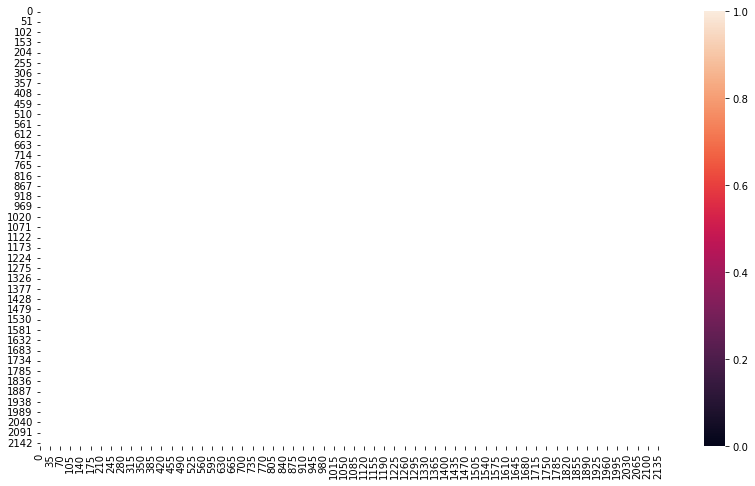

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,8))
# uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(dj, linewidth=0.5)
plt.show()

In [36]:
tfidfvectoriser=TfidfVectorizer(max_features=64)
tfidfvectoriser.fit(documents_df.Tokenized_Description_Test_Cleaned)
tfidf_vectors=tfidfvectoriser.transform(documents_df.Tokenized_Description_Test_Cleaned)

In [37]:
documents_df.Tokenized_Description_Test_Cleaned

0       specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews                                                                                                                                                                                                                                                                                                                                                            
1       institute appropriate effective client therapy treatment                                                                                                                                                                                                                                                                                                                                                     

In [38]:
tfidf_vectors.shape

(2159, 64)

In [39]:
tfidf_vectors=tfidf_vectors.toarray()
print (tfidf_vectors[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


##### Every document has been converted into a 64 dimensional vector. As we set the max_features=64

### Pairwise similarity

##### Pairwise cosine similarity would just be the dot product of the vectors becasue tf-idf vectors from sklearn are already normalized and L2 norm of these vectors is 1. So denominator of cosine similiarity formula is 1 in this case.

In [ ]:
pairwise_similarities=np.dot(tfidf_vectors,tfidf_vectors.T)
pairwise_differences=euclidean_distances(tfidf_vectors)

In [ ]:
print (tfidf_vectors[0])
print (pairwise_similarities.shape)
print (pairwise_similarities[0][:])

##### similarity is highest, 1 at index 0 becasue they are the same documents

In [ ]:
def most_similar(doc_id,similarity_matrix,matrix):
    print (f'Document: {documents_df.iloc[doc_id]["documents_cleaned"]}')
    print ('\n')
    print (f'Similar Documents using {matrix}:')
    if matrix=='Cosine Similarity':
        similar_ix=np.argsort(similarity_matrix[doc_id])[::-1]
    elif matrix=='Euclidean Distance':
        similar_ix=np.argsort(similarity_matrix[doc_id])
    for ix in similar_ix:
        if ix==doc_id:
            continue
        print('\n')
        print (f'Document: {documents_df.iloc[ix]["documents_cleaned"]}')
        print (f'{matrix} : {similarity_matrix[doc_id][ix]}')

In [ ]:
sim_df = cosine_similarity(tfidf_vectors)
sim_df[pairwise_similarities].argsort()[-10:][::-1]

In [ ]:
final = pd.DataFrame()

### for each row 
for i in range(len(documents_df)):

    ### select the corresponding vector to compare with 
    v =  documents_df[documents_df.index.isin([i])]['Tokenized_Description_Test_Cleaned'].values
    ### compare all cases agains the selected vector
    documents_df.apply(lambda x:  cosine_similarity_numba(x.use_vector,v[0])  ,axis=1)

    ### kept the cases with a similarity over a given th, in this case 0.6
    temp = documents_df[documents_df.apply(lambda x:  cosine_similarity_numba(x.use_vector,v[0])  ,axis=1) > 0.6]  
    ###  filter out the base case 
    temp = temp[~temp.index.isin([i])]
    temp['Tokenized_Description_Test_Cleaned'] = copy.copy(documents_df[documents_df.index.isin([i])]['Tokenized_Description_Test_Cleaned'].values[0])
    ### append the result     
    final = pd.concat([final,temp])

In [ ]:
most_similar(1,pairwise_similarities,'Cosine Similarity')

In [ ]:
most_similar(1,pairwise_similarities,'Cosine Similarity')

In [ ]:
most_similar(1,pairwise_differences,'Euclidean Distance')

#### word2vec embeddings

In [ ]:
from keras.preprocessing.text import Tokenizer
import gensim
from keras_preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

In [ ]:
# tokenize and pad every document to make them of the same size
tokenizer=Tokenizer()
tokenizer.fit_on_texts(documents_df.Tokenized_Description_Test_Cleaned)
tokenized_documents=tokenizer.texts_to_sequences(documents_df.Tokenized_Description_Test_Cleaned)
tokenized_paded_documents=pad_sequences(tokenized_documents,maxlen=64,padding='post')
vocab_size=len(tokenizer.word_index)+1

print (tokenized_paded_documents[0])

In [ ]:
#document_word_embeddings.shape
tokenized_paded_documents.shape

In [ ]:
# tf-idf vectors do not keep the original sequence of words, converting them into actual word sequences from the documents

document_embeddings=np.zeros((len(tokenized_paded_documents),118))
words=tfidfvectoriser.get_feature_names()

for i in range(len(tokenized_paded_documents)):
    for j in range(len(words)):
        document_embeddings[i]+=embedding_matrix[tokenizer.word_index[words[j]]]*tfidf_vectors[i][j]
        
document_embeddings=document_embeddings/np.sum(tfidf_vectors,axis=1).reshape(-1,1)
    

In [ ]:
pairwise_similarities=cosine_similarity(document_embeddings)
pairwise_differences=euclidean_distances(document_embeddings)

In [ ]:
most_similar(0,pairwise_similarities,'Cosine Similarity')

In [ ]:
most_similar(0,pairwise_differences,'Euclidean Distance')

#### Glove embeddings

In [ ]:
# reading Glove word embeddings into a dictionary with "word" as key and values as word vectors

embeddings_index = dict()

with open('glove.6B.100d.txt',encoding='utf8') as file:
    for line in file:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    

In [ ]:
# creating embedding matrix, every row is a vector representation from the vocabulary indexed by the tokenizer index. 

embedding_matrix=np.zeros((vocab_size,100))

for word,i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
# tf-idf vectors do not keep the original sequence of words, converting them into actual word sequences from the documents

document_embeddings=np.zeros((len(tokenized_paded_documents),100))
words=tfidfvectoriser.get_feature_names()

for i in range(documents_df.shape[0]):
    for j in range(len(words)):
        document_embeddings[i]+=embedding_matrix[tokenizer.word_index[words[j]]]*tfidf_vectors[i][j]
        
document_embeddings=document_embeddings/np.sum(tfidf_vectors,axis=1).reshape(-1,1)

In [ ]:
document_embeddings.shape

In [ ]:
pairwise_similarities=cosine_similarity(document_embeddings)
pairwise_differences=euclidean_distances(document_embeddings)

In [ ]:
most_similar(0,pairwise_similarities,'Cosine Similarity')

In [ ]:
most_similar(0,pairwise_differences,'Euclidean Distance')

#### Doc2vec model

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
tagged_data = [TaggedDocument(words=word_tokenize(doc), tags=[i]) for i, doc in enumerate(documents_df.Tokenized_Description_Test_Cleaned)]

In [ ]:
model_d2v = Doc2Vec(vector_size=100,alpha=0.025, min_count=1)
  
model_d2v.build_vocab(tagged_data)

for epoch in range(100):
    model_d2v.train(tagged_data,
                total_examples=model_d2v.corpus_count,
                epochs=model_d2v.epochs)

In [ ]:
document_embeddings=np.zeros((documents_df.shape[0],100))

for i in range(len(document_embeddings)):
    document_embeddings[i]=model_d2v.docvecs[i]

In [ ]:
pairwise_similarities=cosine_similarity(document_embeddings)
pairwise_differences=euclidean_distances(document_embeddings)

In [ ]:
most_similar(0,pairwise_similarities,'Cosine Similarity')

In [ ]:
most_similar(0,pairwise_differences,'Euclidean Distance')

#### BERT model

In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [ ]:
document_embeddings = sbert_model.encode(documents_df['Tokenized_Description_Test_Cleaned'])

In [ ]:
pairwise_similarities=cosine_similarity(document_embeddings)
pairwise_differences=euclidean_distances(document_embeddings)

In [ ]:
most_similar(0,pairwise_similarities,'Cosine Similarity')

In [ ]:
most_similar(0,pairwise_differences,'Euclidean Distance')

In [ ]:
most_similar(2,pairwise_similarities,'Cosine Similarity')

In [40]:
documents_df['Tokenized_Description_Test_Cleaned'][0]

'specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews '

In [41]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

In [42]:
document_embeddings =(documents_df['Tokenized_Description_Test_Cleaned'].values.tolist())

In [43]:
document_embeddings

['specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews ',
 'institute appropriate effective client therapy treatment ',
 'participate multidisciplinary case discussions care team ',
 'contribute formulation follow up clients individual care plan  icp  ensure holistic health care coverage ',
 'plan conduct group therapy programme activities day care clients ',
 'review revise programme schedule necessary enhance quality therapy program ',
 'take charge proper documentation therapy records ',
 'interact foster close warm relationships clients families caregivers exhibit sincerity care respect clients ',
 'requirements bachelor degree   diploma occupational therapy qualified registered ahpc  allied health professions council  ',
 'minimum   years working experience hospital eldercare institution good commu

In [44]:

#Compute embeddings
embeddings = model.encode(document_embeddings,convert_to_tensor=True)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.pytorch_cos_sim(embeddings, embeddings)

#Find the pairs with the highest cosine similarity scores
pairs = []
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
        pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

#Sort scores in decreasing order
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

print(len(pairs))
6

for pair in pairs[0:100]:
    i, j = pair['index']
    print("{} \t\t {} \t\t Score: {:.4f}".format(document_embeddings[i], document_embeddings[j], pair['score']))

2329561
email address gs talenttradergroup com ea license c candidate applied advertised position deemed consented us may collect use disclose personal information purpose connection services provided us  		 email address gs talenttradergroup com ea license c candidate applied advertised position deemed consented us may collect use disclose personal information purpose connection services provided us  		 Score: 1.0000
job code cal email address bs capitasingapore com registration no  		 job code cal email address bs capitasingapore com registration no  		 Score: 1.0000
c reeve lim kok kiong registration no  		 c reeve lim kok kiong registration no  		 Score: 1.0000
ensure accounting transactions properly supported recorded reported preparation monthly variance analysis including correlation operational results interaction operational business units timely accurate preparation monthly balance sheet reconciliations part internal control assess mitigate balance sheet risk identifies follo

In [50]:
# Single list of sentences
sentences = ['job purpose the physiotherapist develops and provides the rehabilitative care and services based on the care model to patients of the nursing homes.',
'responsible for all financial matters of shamir singapore including accounting and bookkeeping monthly reporting to shamir hq meeting the statutory local requirements taxes vat etc.',
'jprovide administrative support issue delivery orders invoices quotations and other paperwork keep track of company vehicle maintenance record e.g.',
'ability to work with other departments and management to determine organizational goals pinpoint trends correlations and patterns in complicated data sets.',
'performing basic office tasks such as filing data entry answering phones processing the mail etc.',
'job descriptions to manage project site by supervising the man on site and coordinating the site daily activities with the main contractors.'
'standardize processes and implement best practices.',
'evaluate and prescribe assistive devices to improve function in activities of daily living as required by patients.',
'administration maintain database/records of all patients to provide evidence-based treatment with accurate and appropriate documentation.',
'assess plan implement monitor and evaluate physiotherapy and related service delivery to residents.'
]

#Compute embeddings
embeddings = model.encode(sentences, convert_to_tensor=True)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.pytorch_cos_sim(embeddings, embeddings)

#Find the pairs with the highest cosine similarity scores
pairs = []
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
        pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

#Sort scores in decreasing order
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

print(len(pairs))
6

for pair in pairs[0:10]:
    i, j = pair['index']
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences[i], sentences[j], pair['score']))



36
evaluate and prescribe assistive devices to improve function in activities of daily living as required by patients. 		 assess plan implement monitor and evaluate physiotherapy and related service delivery to residents. 		 Score: 0.6951
job purpose the physiotherapist develops and provides the rehabilitative care and services based on the care model to patients of the nursing homes. 		 assess plan implement monitor and evaluate physiotherapy and related service delivery to residents. 		 Score: 0.6745
job descriptions to manage project site by supervising the man on site and coordinating the site daily activities with the main contractors.standardize processes and implement best practices. 		 assess plan implement monitor and evaluate physiotherapy and related service delivery to residents. 		 Score: 0.6194
job purpose the physiotherapist develops and provides the rehabilitative care and services based on the care model to patients of the nursing homes. 		 evaluate and prescribe assis

In [53]:
import scipy
#@title Sematic Search Form

# code adapted from https://github.com/UKPLab/sentence-transformers/blob/master/examples/application_semantic_search.py

query = 'contractor.' #@param {type: 'string'}

queries = [query]
query_embeddings = model.encode(queries)

# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
number_top_matches = 5 #@param {type: "number"}

print("Semantic Search Results")

for query, query_embedding in zip(queries, query_embeddings):
    distances = scipy.spatial.distance.cdist([query_embedding], embeddings, "cosine")[0]

    results = zip(range(len(distances)), distances)
    results = sorted(results, key=lambda x: x[1])

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for idx, distance in results[0:number_top_matches]:
        print(sentences[idx].strip(), "(Cosine Score: %.4f)" % (1-distance))

Semantic Search Results




Query: contractor.

Top 5 most similar sentences in corpus:
job descriptions to manage project site by supervising the man on site and coordinating the site daily activities with the main contractors.standardize processes and implement best practices. (Cosine Score: 0.5511)
job purpose the physiotherapist develops and provides the rehabilitative care and services based on the care model to patients of the nursing homes. (Cosine Score: 0.3985)
assess plan implement monitor and evaluate physiotherapy and related service delivery to residents. (Cosine Score: 0.3370)
evaluate and prescribe assistive devices to improve function in activities of daily living as required by patients. (Cosine Score: 0.2828)
jprovide administrative support issue delivery orders invoices quotations and other paperwork keep track of company vehicle maintenance record e.g. (Cosine Score: 0.2775)


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

embeddings = embed(
    documents_df['Tokenized_Description_Test_Cleaned']
    )
print(embeddings)

In [ ]:
from scipy.spatial import distance
for i in range (len(documents_df)):
    for j in range(len(documents_df)):
        print(i,distance.cosine(embeddings[i],embeddings[j]))
    #print(1-distance.cosine(embeddings[0],embeddings[i]))
"""print(1 - distance.cosine(embeddings[0], embeddings[1]))
print(1 - distance.cosine(embeddings[0], embeddings[2]))
print(1 - distance.cosine(embeddings[1], embeddings[2]))"""

In [ ]:
from scipy.spatial import distance
for i in range (len(documents_df)):
    print(1-distance.cosine(embeddings[0],embeddings[i]))
"""print(1 - distance.cosine(embeddings[0], embeddings[1]))
print(1 - distance.cosine(embeddings[0], embeddings[2]))
print(1 - distance.cosine(embeddings[1], embeddings[2]))"""

https://colab.research.google.com/github/Alexjmsherman/nlp_practicum_cohort3_instructor/blob/master/lessons/lesson_8_text_similarity/text_similarity_solution.ipynb#scrollTo=n8l7jQ72-sjF

In [ ]:


documents=pd.read_csv('JobPhysio_Cleaned.csv')

documents['Tokenized_Description_Test'] = documents['Tokenized_Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
documents_df=pd.DataFrame(documents,columns=['Tokenized_Description_Test'])
stop_words_l=stopwords.words('english')
documents_df['Tokenized_Description_Test_Cleaned']=documents_df.documents.apply(lambda x: " ".join(re.sub(r'[^a-zA-Z]',' ',w).lower() for w in x.split()))
documents_df=pd.DataFrame(documents_df,columns=['Tokenized_Description_Test_Cleaned'])

In [ ]:
vect = TfidfVectorizer(min_df=.01, max_df=.95, norm='l2', stop_words='english', max_features=1000, ngram_range=(1,10))
titles_vect = vect.fit_transform(documents_df['Tokenized_Description_Test_Cleaned'])

In [ ]:
%%time

# cluster the document using KMeans

# step 1 - import the model
from sklearn.cluster import KMeans

# step 2 - instantiate the model
km = KMeans(n_clusters=100, random_state=42)

# step 3 - fit the model with data
# clustering is unsupervised so we do not have labels to add during .fit()
km.fit(titles_vect)

# step 4 - predict the cluster of each section_title
documents_df['clusters'] = km.predict(titles_vect)

In [ ]:
def review_clusters(df, n_clusters):
    for cl_num in range(n_clusters):
        print(cl_num)
        print(documents_df[df.clusters == cl_num]['Tokenized_Description_Test_Cleaned'].values[0:10])
        print()

review_clusters(documents_df, n_clusters=100)